# Scaling and modellig

Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 


Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data

Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum).


In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.0f' % x)
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('../data/to_trasform.csv')

In [3]:
df.head(2)

,Unnamed: 0,Bearer_Id,Dur. (ms),IMSI,MSISDN,IMEI,last_location,avg_rtt_dl,avg_rtt_ul,throughput_avg_dl_kpbs,throughput_avg_ul_kpbs,retrans_packets_dl_b,retrans_packets_ul_b,tp_dl_below_50kbps_pc,tp_dl_50_250kbps_pc,tp_dl_250kbps_1mbps_pc,tp_dl_above_1mbps_pc,tp_ul_below_10kpbs_pc,tp_ul_10_50_kbps_pc,tp_ul_50_300_kbps_pc,tp_ul_above_300_kpbs_pc,activity_duration_dl,activity_duration_ul,Dur. (ms).1,phone_company,phone_name,t_vol_dl_above_6250B,t_vol_ul_above_1250B,socials_dl_b,socials_ul_b,google_dl_b,google_ul_b,email_dl_b,email_ul_b,youtube_dl_b,youtube_ul_b,netflix_dl_b,netflix_ul_b,gaming_dl_b,gaming_ul_b,other_dl_b,other_ul_b,Total_ul_b,Total_dl_b,total_ul_data,total_dl_data,socials_total_b,google_total_b,email_total_b,youtube_total_b,netflix_total_b,gaming_total_b,other_total_b,total_b
0,0,13114483460844900352,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,42,5,23,44,20884183,766247,100,0,0,0,100,0,0,0,37624,38787,1823652892,Samsung,Samsung Galaxy A5 Sm-A520F,213,214,1545765,24420,1634479,1271433,3563542,137762,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636,36749741,480624086,1570185,2905912,3701304,18355943,17855187,292426453,180558843,345629377
1,1,13114483482878900224,1365104,208201909211140,33681854413,35794009006359,L77566A,65,5,16,26,20884183,766247,100,0,0,0,100,0,0,0,168,3560,1365104371,Samsung,Samsung Galaxy J5 (Sm-J530),971,1022,1926113,7165,3493924,920172,629046,308339,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965,53800391,1180289203,1933278,4414096,937385,39359124,35565545,609920783,541959383,707185356


In [4]:
df['total_dl_ul']=df['total_dl_data'] + df['total_ul_data']

In [5]:
user_total_dl_ul=df.groupby(['MSISDN','total_dl_ul'])['Dur. (ms)'].sum().reset_index(name='sum')

In [6]:
user_total_dl_ul.sort_values(['sum'], ascending=False).head(5)

,MSISDN,total_dl_ul,sum
17437,33625779332,579631808,1859336
17448,33625779332,1256335771,1859327
80743,33664962239,517373827,1823652
17434,33625779332,473417631,1772931
17435,33625779332,512815190,1686493


In [7]:

user_total_dl_ul['Decile'] = pd.qcut(user_total_dl_ul['sum'], 5, labels=False)

In [8]:
user_total_dl_ul.head()

,MSISDN,total_dl_ul,sum,Decile
0,33601001722,1255787564,116720,3
1,33601001754,436417344,181230,4
2,33601002511,1091052984,134969,3
3,33601007832,447568699,49878,1
4,33601008617,944127818,18555,0


compute the total data (DL+UL) per decile class.

In [9]:
decile_class=user_total_dl_ul.groupby(['Decile'])['total_dl_ul'].sum().reset_index(name='sum')

In [10]:
decile_class.sort_values(['sum'], ascending=False).head(5)

,Decile,sum
1,1,42904209602502
4,4,27256822745213
3,3,27201037766975
0,0,27147767244540
2,2,11660640974264


Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

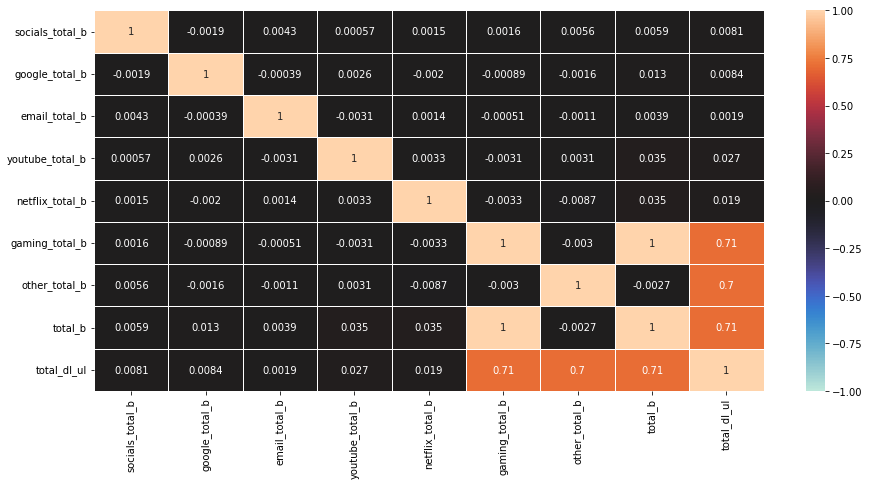

In [12]:
all_col = ['socials_total_b', 'google_total_b','email_total_b', 'youtube_total_b', 'netflix_total_b', 
           'gaming_total_b', 'other_total_b', 'total_b', 'total_dl_ul']
plt.figure(figsize=(15,7))
sns.heatmap(df[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)
plt.show()

Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum).

scaling

In [14]:
numerical_features = ['Bearer_Id', 'Dur. (ms)', 'avg_rtt_dl', 'avg_rtt_ul', 'throughput_avg_dl_kpbs',
       'throughput_avg_ul_kpbs', 'retrans_packets_dl_b',
       'retrans_packets_ul_b', 'tp_dl_below_50kbps_pc', 'tp_dl_50_250kbps_pc',
       'tp_dl_250kbps_1mbps_pc ', ' tp_dl_above_1mbps_pc',
       'tp_ul_below_10kpbs_pc', 'tp_ul_10_50_kbps_pc ',
       'tp_ul_50_300_kbps_pc  ', '  tp_ul_above_300_kpbs_pc',
       'activity_duration_dl', 'activity_duration_ul', 'Dur. (ms).1', 't_vol_dl_above_6250B ',
       't_vol_ul_above_1250B', 'socials_dl_b', 'socials_ul_b', 'google_dl_b',
       'google_ul_b', 'email_dl_b', 'email_ul_b', 'youtube_dl_b',
       'youtube_ul_b', 'netflix_dl_b', 'netflix_ul_b', 'gaming_dl_b',
       'gaming_ul_b', 'other_dl_b', 'other_ul_b', 'Total_ul_b', 'Total_dl_b',
       'total_ul_data', 'total_dl_data', 'socials_total_b', 'google_total_b',
       'email_total_b', 'youtube_total_b', 'netflix_total_b', 'gaming_total_b',
       'other_total_b', 'total_b', 'total_dl_ul']



In [ ]:
cat_features=['IMEI','MSISDN','IMSI','phone_name','phone_company']

In [ ]:
input_features = numerical_features + cat_features

In [ ]:
features = df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import decomposition
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

# Encoding categorical variables

In [ ]:
#casting the columns into strings
labelencoder = LabelEncoder()

#features[cat_features] = features[cat_features].apply(LabelEncoder().fit_transform)
features[cat_features] = features[cat_features].apply(lambda col: LabelEncoder().fit_transform(col.astype(str)), axis=0, result_type='expand')

# Scaling Numerical Data

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features[input_features])

# PCA

In [ ]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [ ]:
pca = decomposition.PCA()

x_reduced = pca.fit_transform(x_scaled) 
pca.explained_variance_ 

In [ ]:
model = pca.fit(pd.DataFrame(x_reduced))
n_pcs = model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = list(features[input_features].columns)

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_imp = pd.DataFrame(dic.items())
#df_imp.columns = ['IMPORTANCE', 'FEATURES']
# df_imp['IMPORTANCE'] = most_important
#df_imp

In [ ]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [ ]:
x_scaled.shape

In [ ]:
import scipy.stats as stats
X_scaled = stats.zscore(x_scaled)
#X_scaled

In [ ]:
pca = decomposition.PCA(n_components=34)
x_reduced = pca.fit_transform(X_scaled)

In [ ]:
x_reduced.shape

In [ ]:
X_reduced = stats.zscore(x_reduced)